## Stochastic Gradient Descent with Linear Regression from Scratch with Animation 

In [128]:
import pandas as pd
import numpy as np


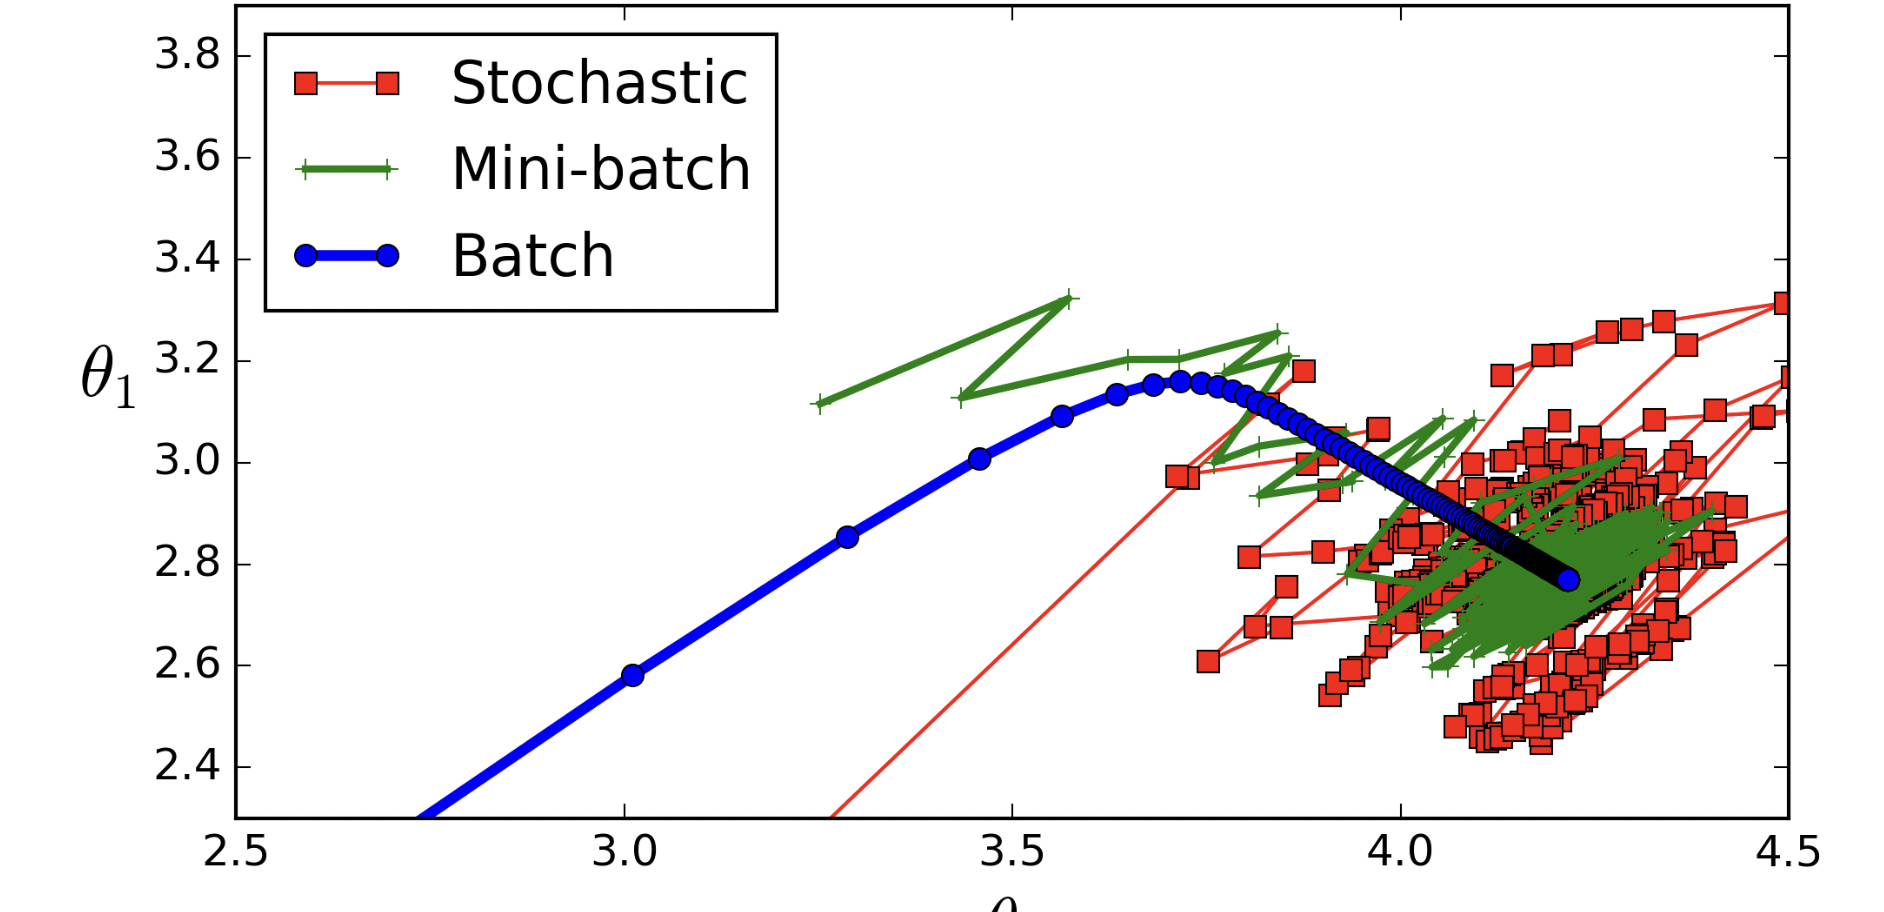


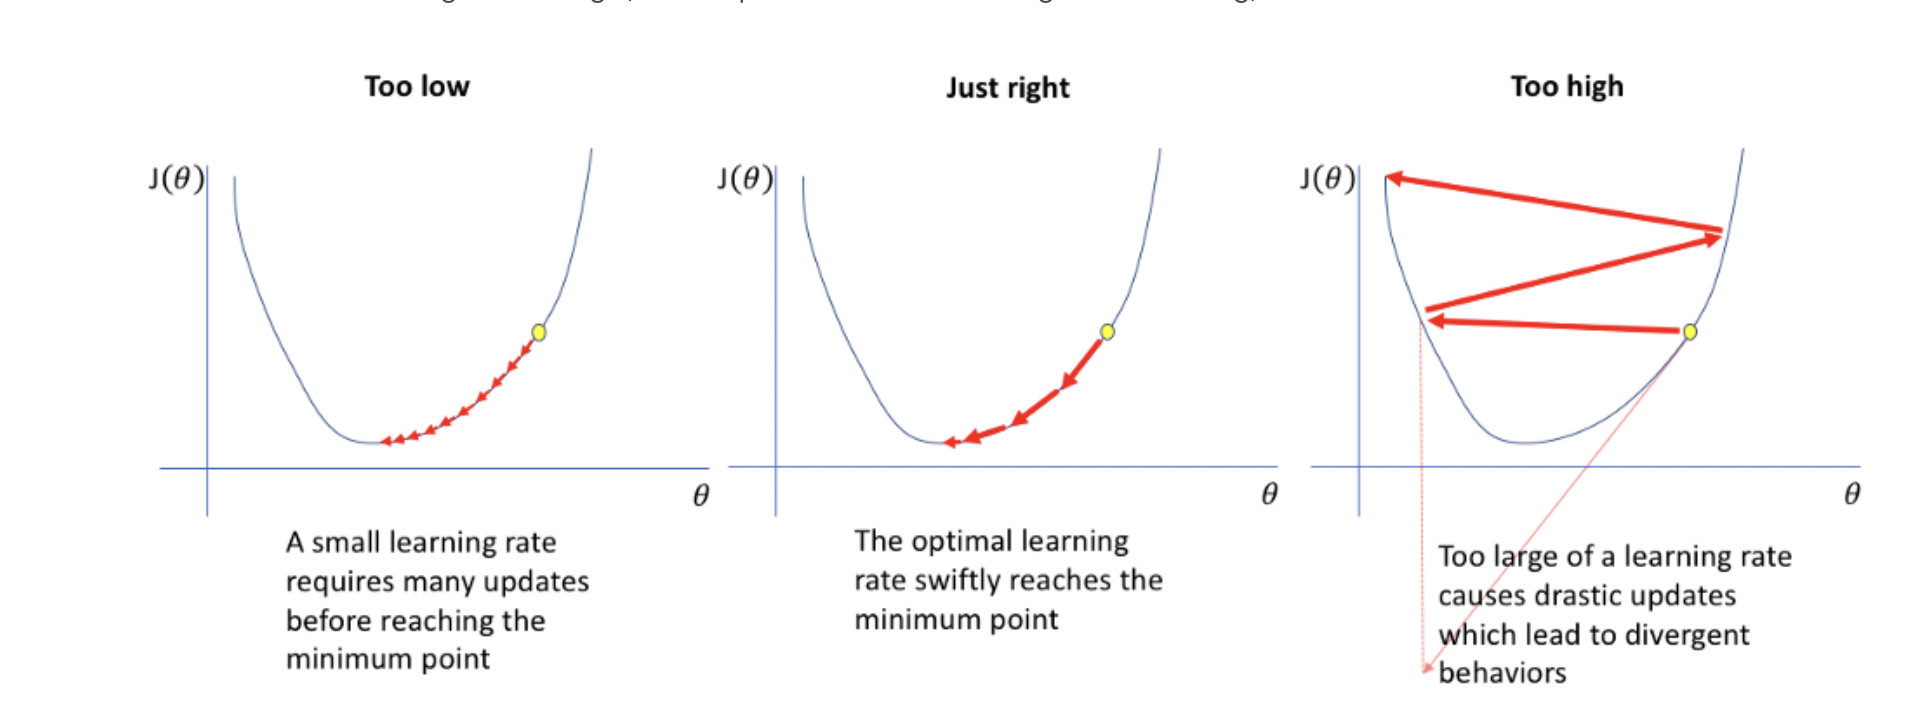

In [129]:
np.random.seed(42)
X = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)

n = X.shape[0]
n

100

In [130]:
# Set HyperParameter

t0,t1 = 5,50 # learning schedule hyperparams
def learning_schedule(t):
    return t0/(t+t1)

epochs=10

#Initialize 
theta0 = 0
theta1 = 0

losslist =  []
losslistObs = []
listtheta0 = []
listtheta1 = []


YCap = np.zeros((epochs * n ,100))
YCapEpoch = np.zeros((epochs,100))

for i in range(epochs):
    print( "------------for " , i , " epoch ----------------")
    for j in range(n):
        learning_rate = learning_schedule(j + i * n)
        rand_index = np.random.randint(n)
        ind_x = X[rand_index:rand_index+1]
        ind_y = y[rand_index:rand_index+1]
        theta0_gradient =    (theta1*X[j] + theta0) - y[j] 
        theta1_gradient =    X[j] *( (theta1*X[j] + theta0) - y[j] )
        theta0 = theta0 - (learning_rate * theta0_gradient)
        theta1 = theta1 - (learning_rate * theta1_gradient)
        print( "----for " , j , " random  --")
        print(" theta0 and theta1 are  ", theta0 , "  ", theta1)
        print(" learning rate is   ", learning_rate )
        #Store theta0 and theta1 intermediate values
        listtheta0.append(theta0)
        listtheta1.append(theta1)
        #  Store Y Pred at every iteration 
        YCap[j + i * n ] = theta1*X + theta0
        # Loss at every observation randomly selected. 
        MSEObs = np.sum(np.square((theta1*X + theta0) - y )) / n 
        losslistObs.append(MSEObs)
        print("MSEObs is " , MSEObs)
    #  Store Y Pred at every iteration 
    YCapEpoch[i] = theta1*X + theta0
    # Loss at every epoch 
    MSE = np.sum(np.square((theta1*X + theta0) - y )) / n 
    losslist.append(MSE)
    print( "------------for " , i , " epoch ----------------")
    print("MSE is " , MSE)
    print(" theta0 and theta1 are  ", theta0 , "  ", theta1)
    
    
## /2m in loss or 1/2 in claculating the gradient doesnt matter much as those are constant. Slope of the regression line
# will still remain the same.
 
## Show why negative of the gradient is the path of steepest slope downhill by changing sign to +
    
    



------------for  0  epoch ----------------
----for  0  random  --
 theta0 and theta1 are   -0.03538426855126036    -0.008787933491680644
 learning rate is    0.1
MSEObs is  6.322868377507254
----for  1  random  --
 theta0 and theta1 are   -0.04228471863768805    -0.00831089053719736
 learning rate is    0.09803921568627451
MSEObs is  6.345521010524025
----for  2  random  --
 theta0 and theta1 are   -0.04619841827449845    -0.009578319735362831
 learning rate is    0.09615384615384616
MSEObs is  6.3771232114844505
----for  3  random  --
 theta0 and theta1 are   -0.06007359427122641    -0.020144473388329164
 learning rate is    0.09433962264150944
MSEObs is  6.564746645544736
----for  4  random  --
 theta0 and theta1 are   -0.05846306481365481    -0.02033302884212003
 learning rate is    0.09259259259259259
MSEObs is  6.560299898265992
----for  5  random  --
 theta0 and theta1 are   -0.044181662789294585    -0.022004930847595815
 learning rate is    0.09090909090909091
MSEObs is  6.52100

<IPython.core.display.Javascript object>


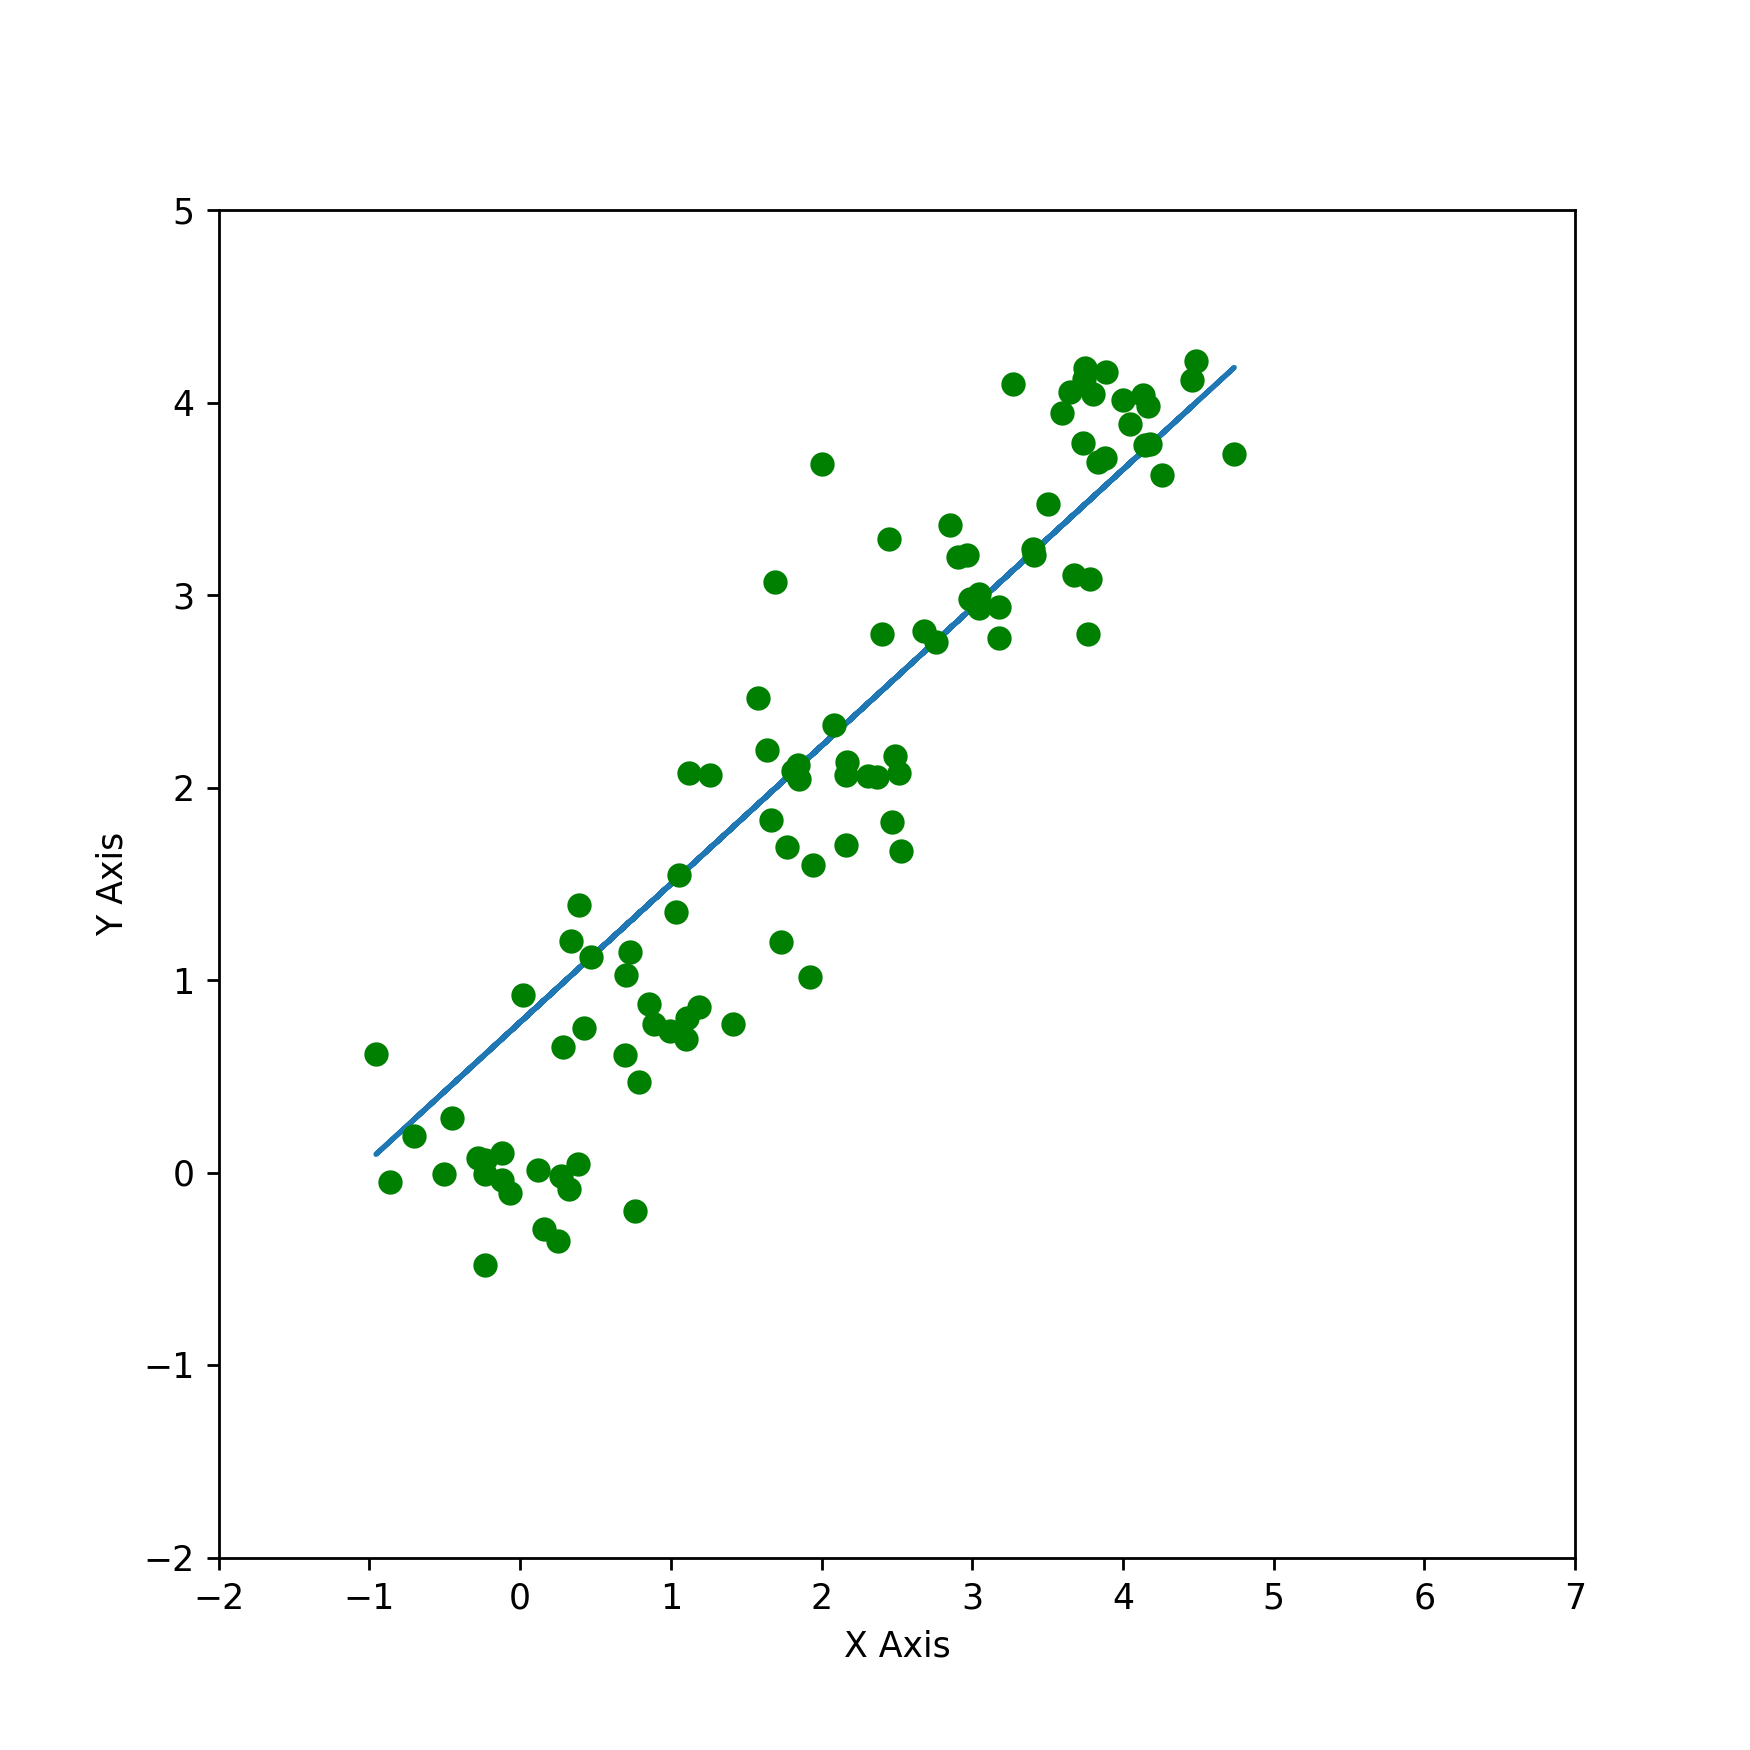

In [65]:
%matplotlib notebook
# A simple example of an animated plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()


line, = ax.plot(X, YCap[0])

plt.rcParams["figure.figsize"] = (7,7)
plt.ylabel("Y Axis")
plt.xlabel("X Axis")
plt.ylim(-2, 5)
plt.xlim(-2,7)
plt.plot(X, y, 'go', label='Training data')


def animate(i):
    print(i)    
    line.set_xdata(X)  # update the data
    line.set_ydata(YCap[i])  # update the data
    return line,


ani = animation.FuncAnimation(fig, animate, frames=np.arange(1, epochs * n ), interval=10 ,repeat = False )
plt.show()

<IPython.core.display.Javascript object>


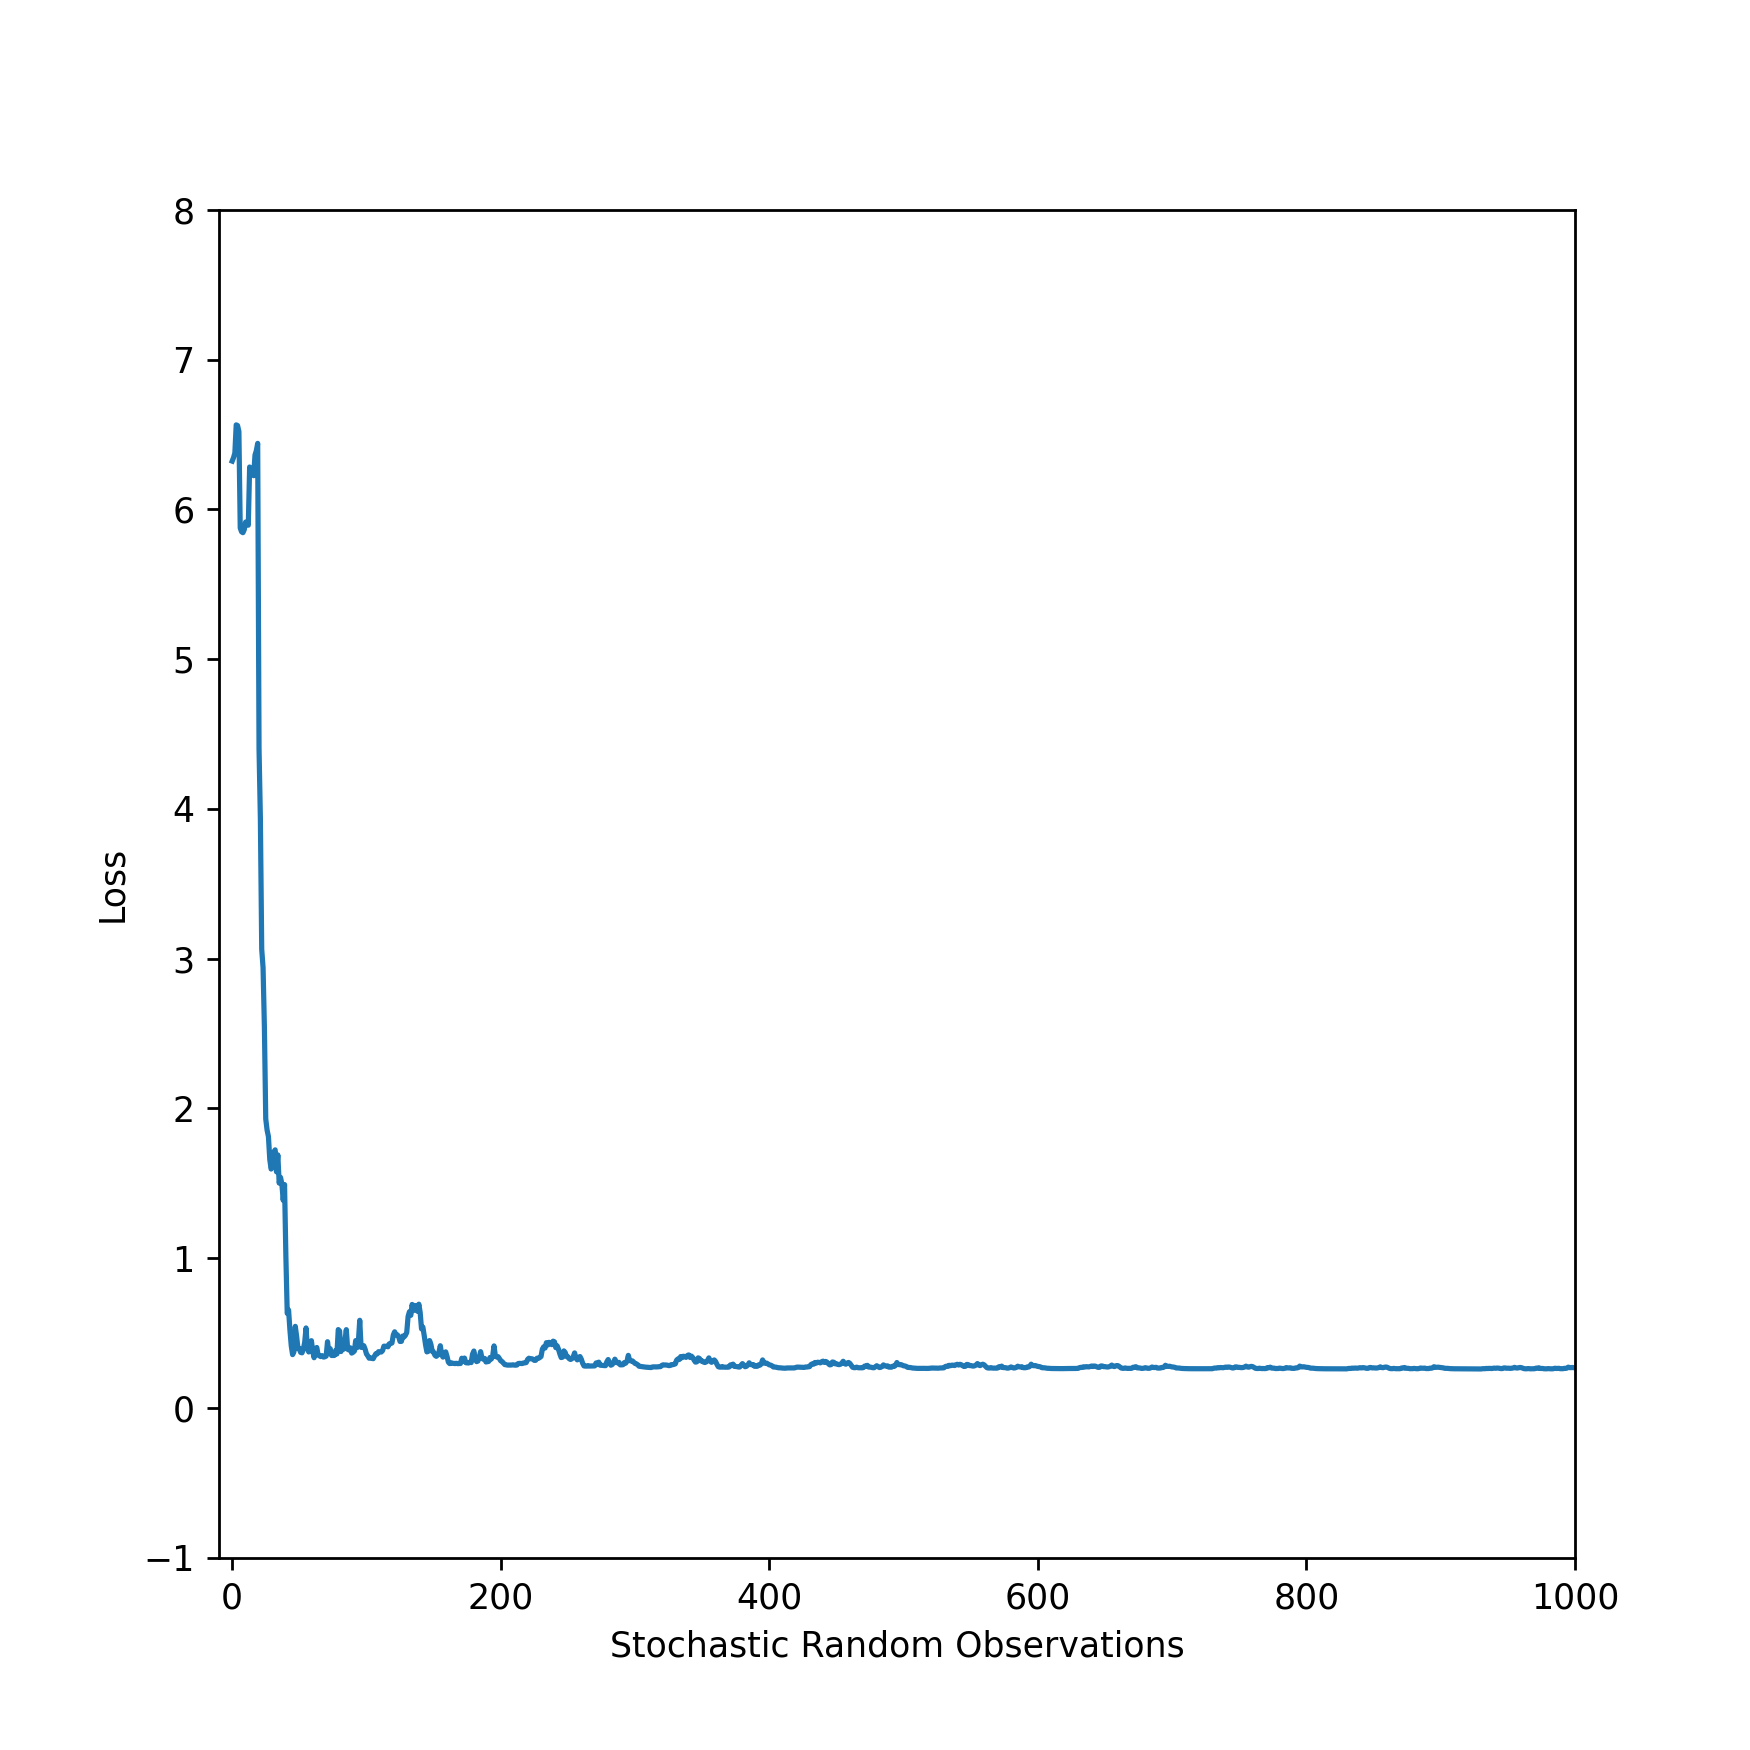

In [72]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = (7,7)
plt.ylabel("Loss")
plt.xlabel("Stochastic Random Observations")
plt.ylim(-1, 8)
plt.xlim(-10,epochs * n )
plt.plot(np.arange(epochs * n ), losslistObs,marker=".", markersize=0.001, label='Loss vs Stochastic Random Observations')

<IPython.core.display.Javascript object>


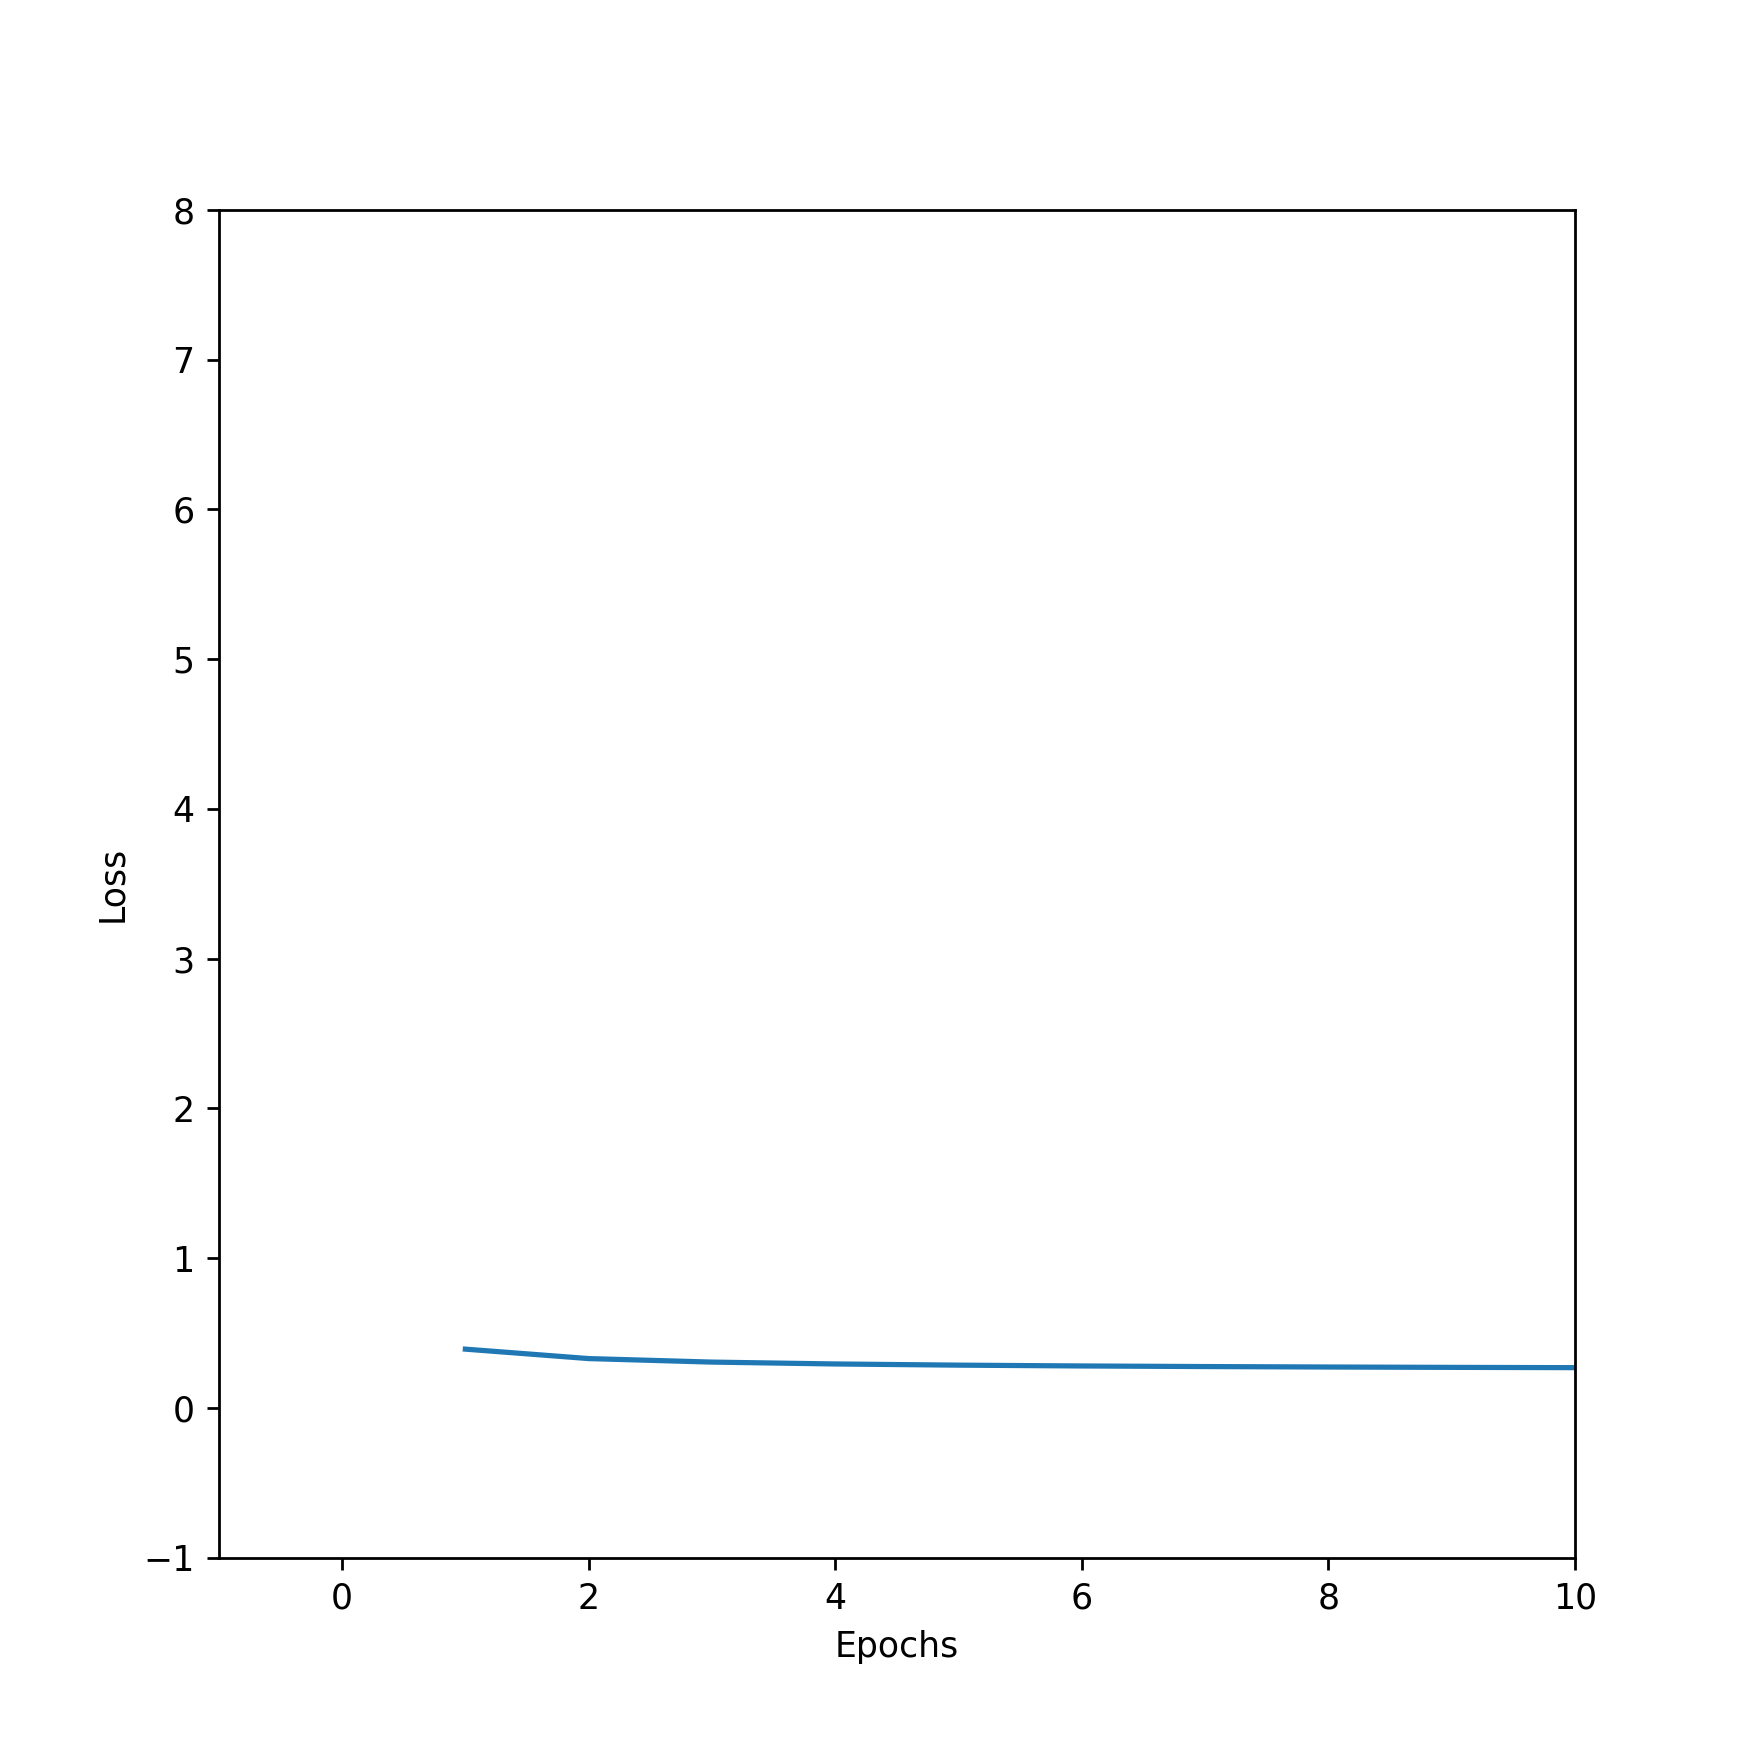

In [73]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = (7,7)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.ylim(-1, 8)
plt.xlim(-1,epochs)
plt.plot(np.arange(1,epochs+1), losslist, marker=".", markersize=0.001, label='Loss vs Epochs')

<IPython.core.display.Javascript object>


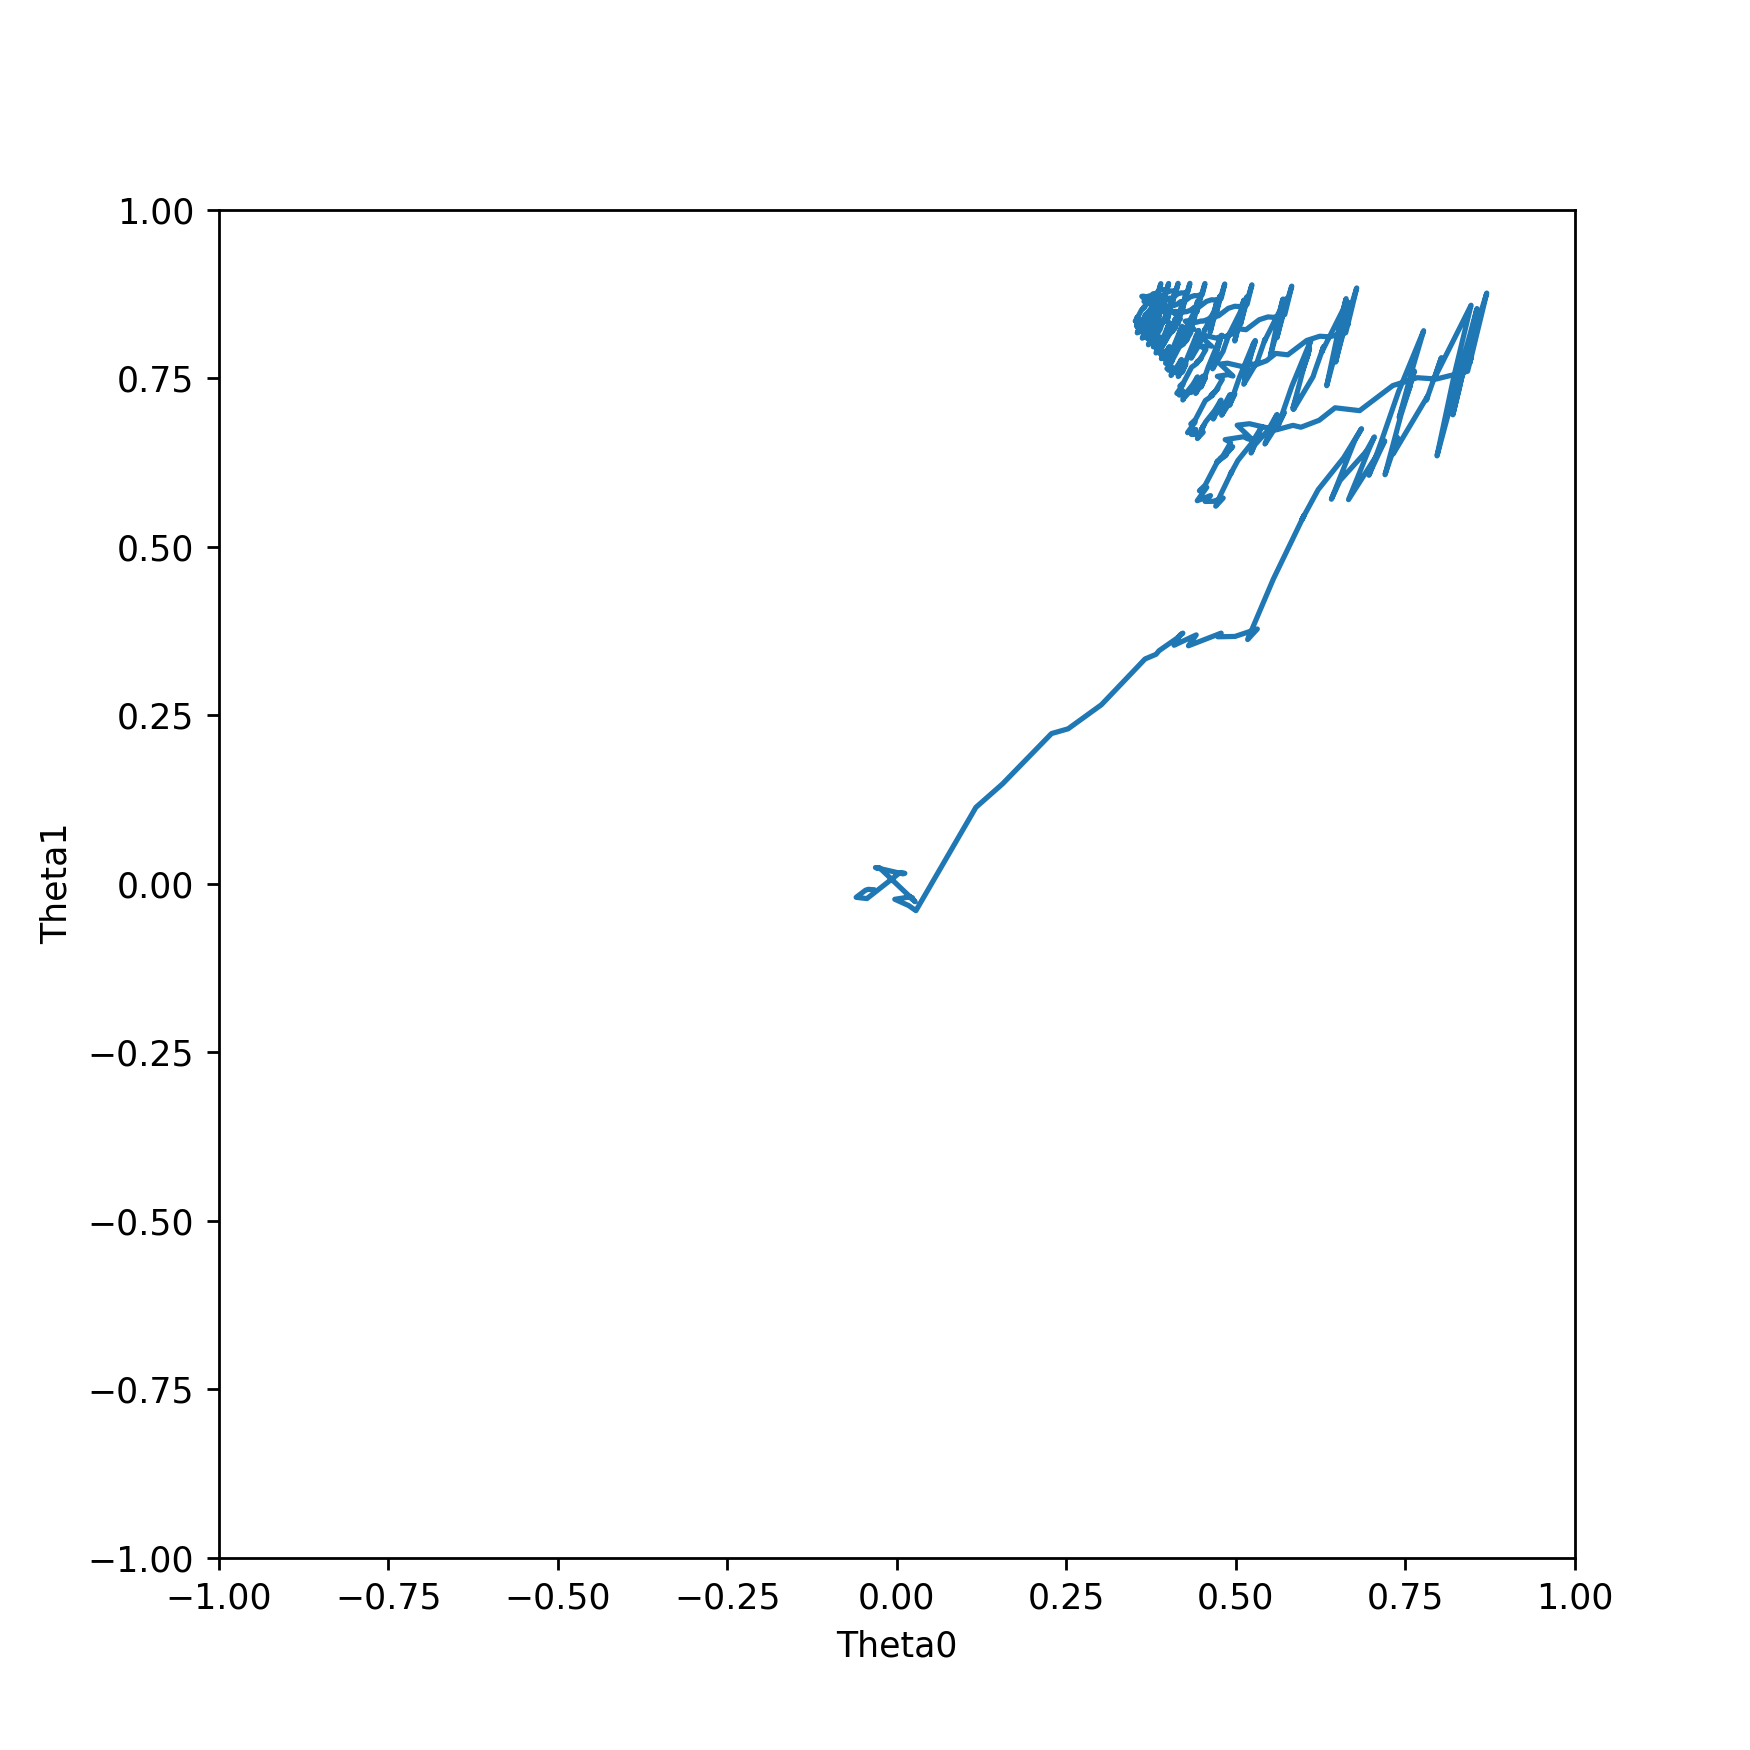

In [74]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = (7,7)
plt.ylabel("Theta1")
plt.xlabel("Theta0")
plt.ylim(-1, 1)
plt.xlim(-1,1)
plt.plot(listtheta0, listtheta1, marker=".", markersize=0.001, label='Stochastic Gradient Descent')

In [8]:
## Validate it using SKLearn 

In [12]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

lm2 = LinearRegression()
X1 = X.reshape(-1, 1)
y1 = y.reshape(-1, 1)

# Fit Model
lm2.fit(X1, y1)
# Predict
y_pred = lm2.predict(X1)
# MSE
print('MSE: ',metrics.mean_squared_error(y1, y_pred))

print( "Theta1 is " ,lm2.coef_ , " Theta0 is " , lm2.intercept_  )

MSE:  0.2570945882496555
Theta1 is  [[0.88128896]]  Theta0 is  [0.28875762]


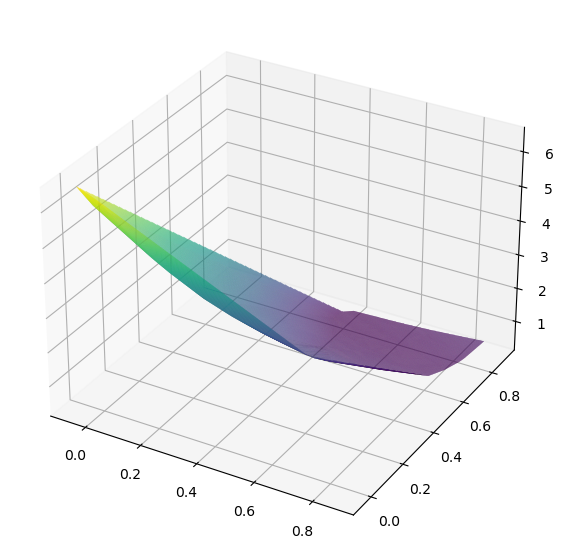

In [136]:
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = listtheta0
Y = listtheta1
Z = losslistObs

plotx,ploty, = np.meshgrid(np.linspace(np.min(X),np.max(X),1000),\
                           np.linspace(np.min(Y),np.max(Y),1000))
plotz = interp.griddata((X,Y),Z,(plotx,ploty),method='linear')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(plotx,ploty,plotz,cstride=1,rstride=1,cmap='viridis')  # or 'hot'